In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



c:\Users\ma3\anaconda3\envs\python_learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us = df[df["job_country"] == "United States"].dropna(subset="salary_year_avg").copy()

In [4]:
job_titles = df_us["job_title_short"].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_us_top6 = df_us[df_us["job_title_short"].isin(job_titles)].copy()

In [13]:
job_order = df_us_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

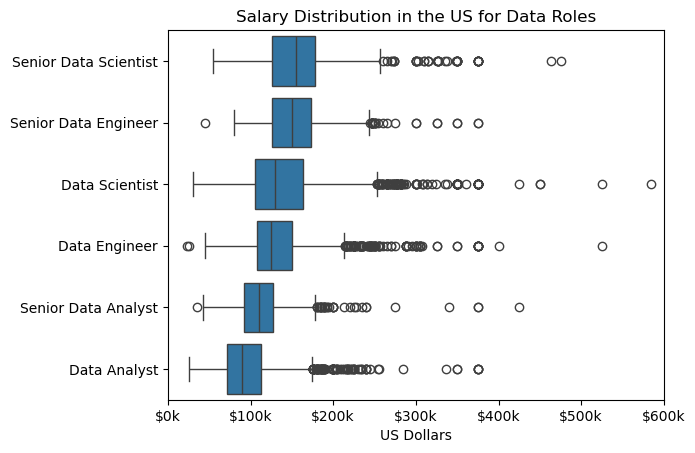

In [14]:
sns.boxplot(data=df_us_top6, y="job_title_short", x="salary_year_avg", order=job_order)

plt.title("Salary Distribution in the US for Data Roles")
plt.xlabel("US Dollars")
plt.ylabel("")
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}k"))
plt.show()